### **Introduction**

This analysis focuses on customer and marketing data for a men’s fashion retailer, aiming to provide strategic insights into customer behavior, channel performance, and demographic differences. The goal of this analysis is to help the retailer optimize its marketing efforts, improve customer retention, and maximize profitability.

#### **Key Objectives:**
1. **Data Preparation & Cleaning**: Ensure the data is structured, clean, and ready for analysis. This includes handling missing values, ensuring proper data types, and loading data from multiple sources.
2. **Channel Performance Analysis**: Evaluate the performance of various marketing channels (e.g., Paid Search, Organic Search, Affiliates) to identify which channels provide the best return on investment (ROI) and customer lifetime value (CLV).
3. **Demographic Differences Analysis**: Analyze how customer demographics (age, location, and contact preferences) influence profitability and customer behavior, identifying key segments for targeted marketing efforts.
4. **Customer Behavior Analysis**: Assess customer purchasing behavior, including subsequent orders and the impact of promotions, and identify churn risks to improve customer retention.
5. **Recommendations**: Based on the analysis, provide actionable recommendations on how the retailer can optimize marketing spend, target key demographics, and enhance customer retention strategies.

This notebook is structured to first prepare and clean the data, followed by exploring key areas of performance and customer segmentation. Finally, actionable insights will be summarized to guide future marketing and customer retention strategies.


### **Step 1: Data Preparation & Cleaning**

#### **Tasks**:
1. **Understand the structure**: Review the sheets and columns in each DataFrame.
   - **Definitions**: Reference terms and their meanings.
   - **Cost**: Monthly marketing spend across different channels.
   - **Value_Info**: Customer purchase behavior (profits, orders).
   - **Demographic_Info**: Demographic details (age, location, acquisition source).
   
2. **Check for missing data**:
   - Handle missing values, if any, across all DataFrames.
   - Use `df.isnull().sum()` to identify missing values.
   - Decide how to handle missing data: Drop, fill with averages, or flag them.

3. **Convert data types**:
   - Ensure that numeric columns (e.g., profit, counts) are appropriately typed.
   - Convert date columns to datetime format where necessary.

#### **Deliverables**:
- **Cleaned DataFrames** ready for analysis.


In [119]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [120]:
file_path = "../data/Quantitative_Task_-_Data_Analysis_-_Auction.xlsx"
xls = pd.ExcelFile(file_path)

# Load the sheets into DataFrames
sheet_names = xls.sheet_names
dataframes = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheet_names}

# Assign DataFrames for specific use
Definitions = dataframes['Definitions']
Cost = dataframes['Cost']
Value_Info = dataframes['Value Info']
Demographic_Info = dataframes['Demographic Info']

print("Data loaded successfully.")

Data loaded successfully.


In [121]:
def summarize_data(df, df_name):
    """Summarize a DataFrame including missing values and data types."""
    print(f"--- {df_name} DataFrame Summary ---")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nFirst few rows:")
    print(df.head(), "\n")
    
# Summarize all DataFrames
for name, df in dataframes.items():
    summarize_data(df, name)

# Handle missing values and clean data (example cleaning step)
Demographic_Info['Date Of Birth'] = pd.to_datetime(Demographic_Info['Date Of Birth'], errors='coerce')
Demographic_Info['Registration Date'] = pd.to_datetime(Demographic_Info['Registration Date'], errors='coerce')


--- Definitions DataFrame Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Definitions  10 non-null     object
 1   Unnamed: 1   9 non-null      object
dtypes: object(2)
memory usage: 308.0+ bytes
None

Missing values:
Definitions    1
Unnamed: 1     2
dtype: int64

First few rows:
                     Definitions  \
0               1st Order Profit   
1        Subsequent Order Profit   
2              Subsequent Orders   
3  Total value of all promotions   
4                            NaN   

                                          Unnamed: 1  
0  Total profit made on first order from a custom...  
1  Total profit made on all subsequent orders fro...  
2  Total number of orders subsequent to the 1st o...  
3  The total loss of the promotional discounts th...  
4                                                NaN   

--- Cost DataFra

In the above cell, we can see many missing title values, this make data analysis difficult when investigating the male/female demographic. I will remove these missing values and save it in a separate dataframe from the main analysis so we can still do comprehensive analysis on the rest of the demographical categories and a separate analysis on a subset of the data that includes the title data.

In [122]:
# Remove NaN values from the 'Title' column for this calculation
demographic_with_title = Demographic_Info.dropna(subset=['Title'])

# Group by 'Title' to calculate male and female counts
gender_counts = demographic_with_title['Title'].value_counts()

# Define male and female categories based on the 'Title'
male_titles = ['Mr']
female_titles = ['Mrs', 'Ms', 'Miss']

# Calculate the total number of males and females
total_males = gender_counts[male_titles].sum()
total_females = gender_counts[female_titles].sum()

# Calculate the percentage of males and females
total_customers_with_title = total_males + total_females
male_percentage = (total_males / total_customers_with_title) * 100
female_percentage = (total_females / total_customers_with_title) * 100

# Display the results
print(f"Total Males: {total_males} ({male_percentage:.2f}%)")
print(f"Total Females: {total_females} ({female_percentage:.2f}%)")

Total Males: 19981 (73.02%)
Total Females: 7382 (26.98%)


In [123]:
# Dropping the 'Title' column due to too many missing values
Demographic_Info.drop(columns=['Title'], inplace=True)

def calculate_spend_and_acquisition(cost_df, demographic_df, channels):
    """Calculate total spend, average spend, and customer acquisition by channel."""
    total_spend = cost_df[channels].sum()
    avg_spend = cost_df[channels].mean()
    customer_acquisition = demographic_df['Source of Customer'].value_counts()

    return total_spend, avg_spend, customer_acquisition

# Define the relevant channels and calculate metrics
channels = ['Paid Search', 'Affiliates']
total_spend, avg_spend, customer_acquisition = calculate_spend_and_acquisition(Cost, Demographic_Info, channels)

print("Total Spend by Channel:\n", total_spend)
print("Average Spend per Month by Channel:\n", avg_spend)
print("Customer Acquisition by Channel:\n", customer_acquisition)


Total Spend by Channel:
 Paid Search    187352.88
Affiliates     199843.00
dtype: float64
Average Spend per Month by Channel:
 Paid Search    62450.960000
Affiliates     66614.333333
dtype: float64
Customer Acquisition by Channel:
 Source of Customer
Direct            11252
Organic Search     8392
Paid Search        6518
Affiliates         3868
Paid Social        1411
Name: count, dtype: int64


### **Step 2: Channel Performance Analysis**

#### **Objective**:
Identify which marketing channels drive the most value and provide the best return on investment (ROI).

#### **Tasks**:
1. **Summarize total and average spend** for each marketing channel from the `Cost` DataFrame.
   - Group by channel and calculate total marketing spend.

2. **Compare marketing spend to customer acquisition** in `Demographic_Info`.
   - Join customer acquisition channels from `Demographic_Info` with marketing spend from `Cost` to assess ROI.

3. **Calculate key metrics**:
   - **Cost per acquisition (CPA)** by dividing spend by the number of customers acquired per channel.
   - **Profit per channel** by aggregating the `1st Order Profit` and `Subsequent Order Profit` by `Source of Customer`.

4. **Plot key metrics**:
   - Plot spend vs profit by channel to see which channels provide the highest ROI.


Total Profit by Channel:
 Source of Customer
Affiliates        138310.352264
Direct            534625.999680
Organic Search    407498.059650
Paid Search       305940.955560
Paid Social        85690.836192
Name: Total Profit, dtype: float64
Cost per Acquisition (CPA) by Channel:
 Affiliates        51.665719
Direct                  NaN
Organic Search          NaN
Paid Search       28.743921
Paid Social             NaN
dtype: float64


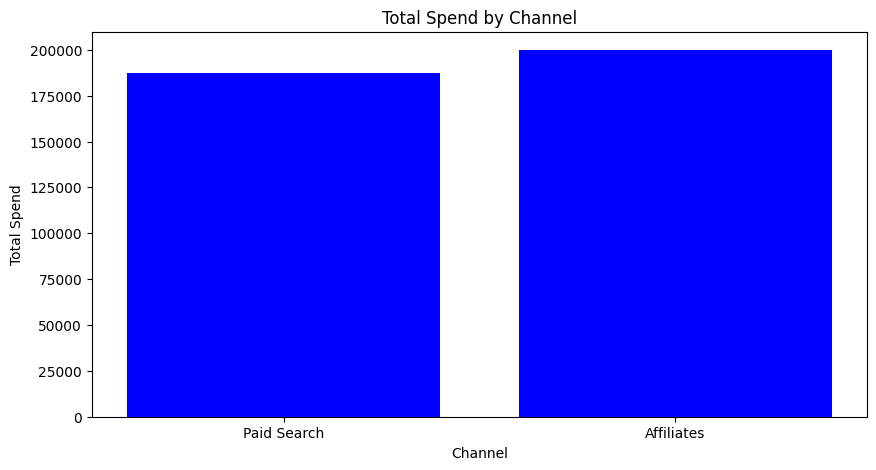

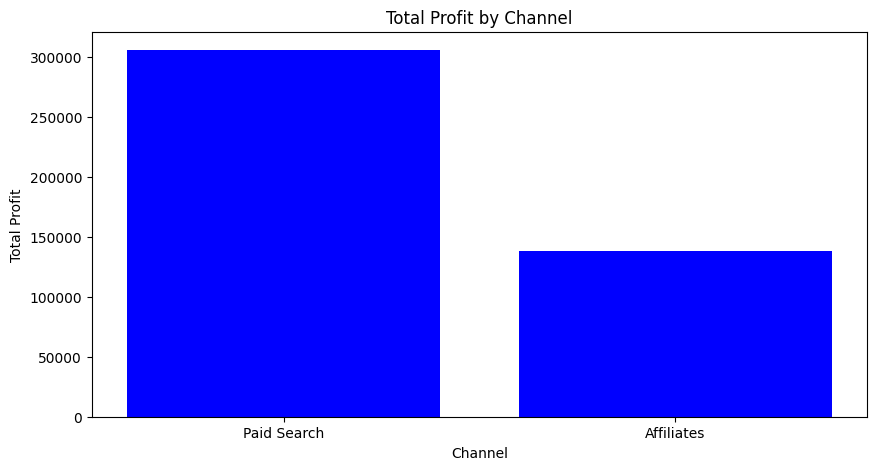

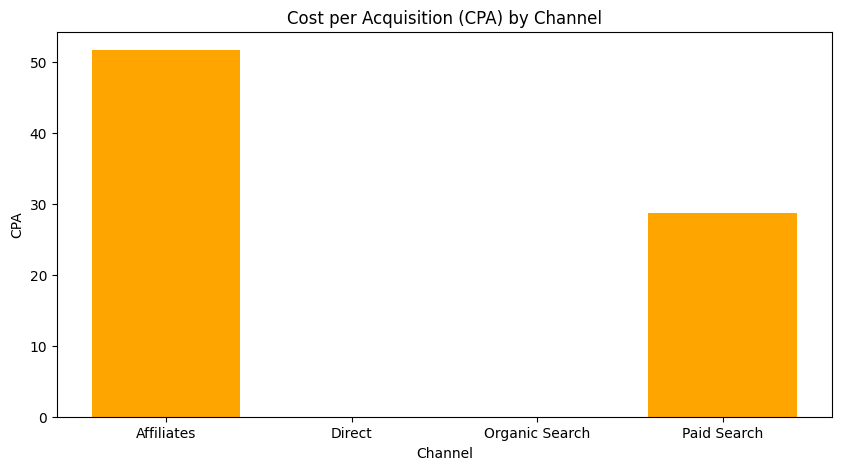

In [124]:
def calculate_profit_and_cpa(merged_df, total_spend, customer_acquisition, channels):
    """Calculate total profit and CPA by channel."""
    # Calculate Total Profit
    merged_df['Total Profit'] = merged_df['1st Order Profit'] + merged_df['Subsequent Order Profit']

    # Group by Source of Customer to get total profit per channel
    profit_per_channel = merged_df.groupby('Source of Customer')['Total Profit'].sum()

    # Match spend and customer acquisition
    cost_per_channel = pd.Series([total_spend[channel] for channel in channels], index=channels)
    cpa_per_channel = cost_per_channel / customer_acquisition.replace(0, pd.NA)  # Avoid division by zero

    return profit_per_channel, cpa_per_channel

# Merge Demographic_Info and Value_Info DataFrames
merged_data = pd.merge(Demographic_Info, Value_Info, on='Customer ID')

# Calculate profit and CPA
profit_per_channel, cpa_per_channel = calculate_profit_and_cpa(merged_data, total_spend, customer_acquisition, channels)

print("Total Profit by Channel:\n",profit_per_channel)
print("Cost per Acquisition (CPA) by Channel:\n",cpa_per_channel)

# Plot marketing spend vs profit by channel
def plot_bar_chart(data, title, xlabel, ylabel, color='blue', figsize=(10, 5)):
    """Generate a bar chart for the given data."""
    plt.figure(figsize=figsize)
    plt.bar(data.index, data.values, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot total spend and profit by channel
plot_bar_chart(total_spend, "Total Spend by Channel", "Channel", "Total Spend")
plot_bar_chart(profit_per_channel.loc[channels], "Total Profit by Channel", "Channel", "Total Profit")

# Plot CPA by channel
plot_bar_chart(cpa_per_channel, "Cost per Acquisition (CPA) by Channel", "Channel", "CPA", color='orange')



### **Step 3: Demographic Differences Analysis**

#### **Objective**:
Understand how customer demographics influence profitability, purchasing behavior, and channel performance.

#### **Tasks**:
1. **Segment customers by age groups** (using `Date of Birth` from `Demographic_Info`) and analyze their:
   - Average `1st Order Profit`.
   - Average `Subsequent Orders Count`.
   - Channel of acquisition (`Source of Customer`).

2. **Analyze geographic patterns**:
   - Group customers by `City` and see if certain locations are more profitable or have higher customer acquisition rates.

3. **Contact Preferences**:
   - Evaluate differences in profitability between customers who allowed contact vs. those who didn’t.


In [125]:
# Create an 'Age' column by calculating the difference between the current year and Date of Birth
current_year = datetime.now().year
Demographic_Info['Age'] = current_year - Demographic_Info['Date Of Birth'].dt.year

# Define age groups
bins = [18, 25, 35, 45, 55, 65, 100]  # Adjust these bins as needed
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
Demographic_Info['Age Group'] = pd.cut(Demographic_Info['Age'], bins=bins, labels=labels)

# Now merge the updated Demographic_Info with Value_Info
merged_data = pd.merge(Demographic_Info, Value_Info, on='Customer ID')

# Calculate total profit (1st Order Profit + Subsequent Order Profit) for each customer
merged_data['Total Profit'] = merged_data['1st Order Profit'] + merged_data['Subsequent Order Profit']

# Function to analyze demographics based on any grouping
def analyze_demographics(merged_df, group_by_column, metrics):
    demographic_summary = merged_df.groupby(group_by_column).agg(metrics)
    print(f"\n{group_by_column} Summary:")
    display(demographic_summary)
    return demographic_summary

# Metrics to calculate for each demographic group
metrics = {
    '1st Order Profit': 'mean',
    'Subsequent Orders Count': 'mean',
    'Total Profit': 'sum',
    'Customer ID': 'count'
}

# Analyze demographics by age group
analyze_demographics(merged_data, 'Age Group', metrics)

# Analyze profitability by city
analyze_demographics(merged_data, 'Address City', metrics)

# Analyze contact preferences
analyze_demographics(merged_data, 'Contact Allowed', metrics)



Age Group Summary:


/tmp/ipykernel_832/3754117126.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_summary = merged_df.groupby(group_by_column).agg(metrics)


,1st Order Profit,Subsequent Orders Count,Total Profit,Customer ID
Age Group,,,,
18-25,NaN,NaN,0.000000,0
26-35,9.165768,4.135493,182112.931000,4384
36-45,9.718833,4.066567,595213.387036,13430
46-55,11.496207,4.021914,383173.812678,7438
56-65,13.595367,3.988393,200714.461912,3360
65+,12.582368,4.023350,110518.703120,1970



Address City Summary:


,1st Order Profit,Subsequent Orders Count,Total Profit,Customer ID
Address City,,,,
Ashbourne,11.297963,3.826923,5.222802e+03,104
Athlone,10.377811,4.067114,7.648960e+03,149
Athy,10.846556,4.063830,4.526634e+03,94
Balbriggan,10.871808,3.158416,4.206168e+03,101
Ballina,12.096988,4.647059,6.308190e+03,119
Ballinasloe,11.174419,3.652174,5.112460e+03,115
Blackrock,11.425744,3.923729,5.997502e+03,118
Bray,10.639282,3.587379,9.043734e+03,206
Carlow,10.791042,3.563319,1.027964e+04,229



Contact Allowed Summary:


,1st Order Profit,Subsequent Orders Count,Total Profit,Customer ID
Contact Allowed,,,,
N,10.721969,3.216797,512531.009152,12943
Y,10.652435,4.668178,959535.194194,17648


,1st Order Profit,Subsequent Orders Count,Total Profit,Customer ID
Contact Allowed,,,,
N,10.721969,3.216797,512531.009152,12943
Y,10.652435,4.668178,959535.194194,17648


From the above cell we can see that when customers are contacted, they are more likely to purchase subsequent orders

In [126]:
# Group by City to calculate total and average profit for each city
city_profit = merged_data.groupby('Address City').agg({
    'Total Profit': ['sum', 'mean'],  # Sum of total profit and average profit per customer
    'Customer ID': 'count'  # Total customers in each city
})

# Sort cities by total profit for analysis
city_profit.columns = ['Total Profit', 'Average Profit per Customer', 'Customer Count']
city_profit = city_profit.sort_values(by='Total Profit', ascending=False)

# Display the results
print("Profitability by City:")
display(city_profit.head(10))  # Display top 10 cities by profit


Profitability by City:


,Total Profit,Average Profit per Customer,Customer Count
Address City,,,
Dublin,1.015310e+06,47.982498,21160
Cork,5.379036e+04,51.326678,1048
Galway,2.947283e+04,46.195660,638
Limerick,2.894300e+04,46.909230,617
Waterford,1.805357e+04,47.384701,381
Kilkenny,1.330647e+04,50.594933,263
Dundalk,1.205703e+04,50.029183,241
Wexford,1.187609e+04,49.278394,241
Mullingar,1.163404e+04,48.882535,238


### **Step 4: Customer Behavior Analysis**

#### **Objective**:
Evaluate customer purchasing behavior to identify opportunities for increasing customer lifetime value (CLV).

#### **Tasks**:

1. **Customer segmentation**:
   - Analyze how customers behave post-acquisition:
     - Compare average `Subsequent Orders Count` across different channels.
     - Compare `Subsequent Order Profit` and `1st Order Profit` to determine customer lifetime value by channel.

2. **Promotional impact**:
   - Analyze the impact of promotions by reviewing `Total value of all promotions` in relation to `Subsequent Orders Count` and profitability.

3. **Churn risk analysis**:
   - Identify any patterns in customers who only make a `1st Order` and no subsequent orders, which could indicate churn.
   - Plot time between first and subsequent orders to evaluate the customer retention rate.


In [127]:
# Function to analyze customer behavior (CLV, promotions, churn)
def customer_behavior_analysis(merged_df):
    # CLV by channel
    clv_summary = merged_df.groupby('Source of Customer')['Total Profit'].mean()
    
    # Promotion impact
    promotion_impact = merged_df.groupby('Total value of all promotions').agg({
        'Subsequent Orders Count': 'mean',
        'Total Profit': 'mean'
    })
    
    # Churn analysis
    churned_customers = merged_df[merged_df['Subsequent Orders Count'] == 0]
    churn_rate_by_channel = churned_customers['Source of Customer'].value_counts() / merged_df['Source of Customer'].value_counts()

    print(f"\nCLV by Channel:\n{clv_summary}")
    print(f"\nPromotion Impact on Profit and Subsequent Orders:\n{promotion_impact}")
    print(f"\nChurn Rate by Channel:\n{churn_rate_by_channel}")

# Call the function to analyze customer behavior
customer_behavior_analysis(merged_data)




CLV by Channel:
Source of Customer
Affiliates        36.823842
Direct            48.864455
Organic Search    49.914020
Paid Search       48.149348
Paid Social       62.275317
Name: Total Profit, dtype: float64

Promotion Impact on Profit and Subsequent Orders:
                               Subsequent Orders Count  Total Profit
Total value of all promotions                                       
-0.049922                                          0.0      12.48000
-0.048879                                          0.0      18.23472
-0.048758                                          0.0      13.82400
-0.048637                                          2.0      27.23688
-0.047506                                          7.0     105.82560
...                                                ...           ...
 112.588116                                       22.0     339.17400
 123.915766                                        8.0     141.56928
 126.994463                                     

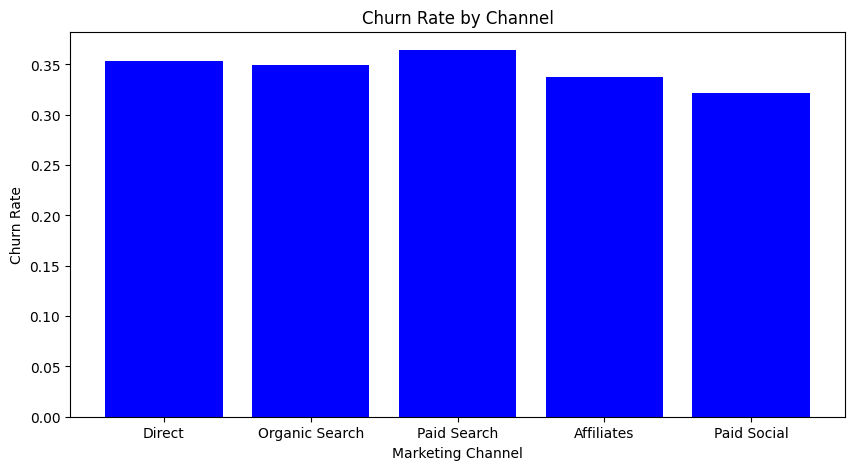

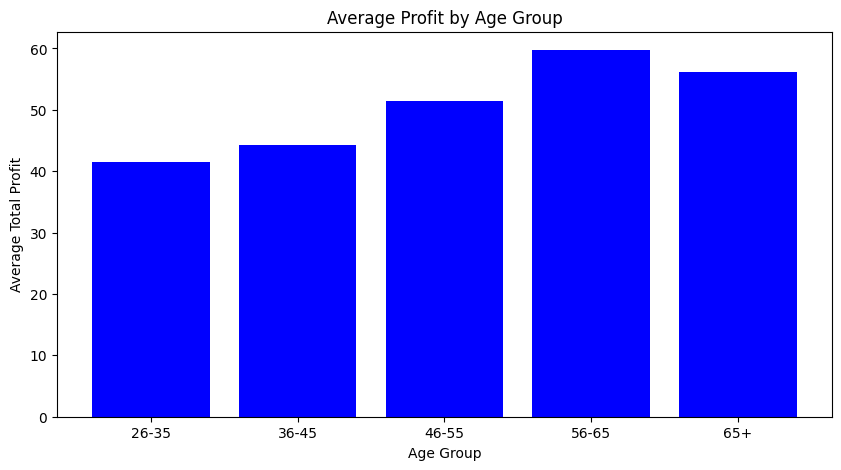

In [128]:
import matplotlib.pyplot as plt

# Identify churned customers (Subsequent Orders Count = 0)
churned_customers = merged_data[merged_data['Subsequent Orders Count'] == 0]

# Calculate churn rate by marketing channel
churn_rate_by_channel = churned_customers['Source of Customer'].value_counts() / merged_data['Source of Customer'].value_counts()

# Plot churn rate by channel
def plot_bar_chart(data, title, xlabel, ylabel, color='blue', figsize=(10, 5)):
    """Generate a bar chart for the given data."""
    plt.figure(figsize=figsize)
    plt.bar(data.index, data.values, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Call the function for Churn Rate and Age Group Profitability
plot_bar_chart(churn_rate_by_channel, 'Churn Rate by Channel', 'Marketing Channel', 'Churn Rate')
plot_bar_chart(age_group_summary['Total Profit'], 'Average Profit by Age Group', 'Age Group', 'Average Total Profit')


### **Step 5: Recommendations and Conclusion**

#### **Objective**:
Summarize the findings and provide actionable recommendations based on the analysis.

#### **Tasks**:
1. **Compile key insights** from channel performance, demographic differences, and customer behavior.
   
2. **Make strategic recommendations** on:
   - Which channels the operator should invest more in (based on ROI and customer quality).
   - Which demographics to target with marketing efforts.
   - How to improve customer retention and maximize profitability.

#### **Deliverables**:
- A clear summary of insights and actionable recommendations for the operator to focus on.


In [129]:
# Channel performance summary (CPA, Total Profit, Customer Acquisition)
channel_performance_summary = pd.DataFrame({
    'Total Spend': total_spend,
    'Customer Acquisition': customer_acquisition,
    'Total Profit': profit_per_channel,
    'CPA': cpa_per_channel
})

# Display the channel performance summary
print("Channel Performance Summary:")
print(channel_performance_summary)

# Calculate average CPA and CLV for filtering
average_cpa = channel_performance_summary['CPA'].mean()
average_clv = clv_summary.mean()

print("Average CPA:", average_cpa)
print("Average CLV:", average_clv)

# Fill NaN values in Total Spend with 0
channel_performance_summary['Total Spend'].fillna(0, inplace=True)

Channel Performance Summary:
                Total Spend  Customer Acquisition   Total Profit        CPA
Affiliates        199843.00                  3868  138310.352264  51.665719
Direct                  NaN                 11252  534625.999680        NaN
Organic Search          NaN                  8392  407498.059650        NaN
Paid Search       187352.88                  6518  305940.955560  28.743921
Paid Social             NaN                  1411   85690.836192        NaN
Average CPA: 40.204820082990295
Average CLV: 49.205396403611765


/tmp/ipykernel_832/3831479225.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  channel_performance_summary['Total Spend'].fillna(0, inplace=True)


In [130]:
# Define the function for summarizing demographics
def calculate_demographic_summary(df, group_by_column, metrics):
    """Calculate summary statistics by demographic group."""
    summary = df.groupby(group_by_column).agg(metrics)
    return summary

# Define the metrics to calculate once
metrics = {
    'Total Profit': 'mean',
    'Subsequent Orders Count': 'mean'
}

# Call the function for each demographic analysis
age_group_summary = calculate_demographic_summary(merged_data, 'Age Group', metrics)
city_summary = calculate_demographic_summary(merged_data, 'Address City', metrics)
contact_preference_summary = calculate_demographic_summary(merged_data, 'Contact Allowed', metrics)

# Display the results
print("Age Group Profitability Summary:")
display(age_group_summary)

print("\nCity Profitability Summary (Top Cities):")
display(city_summary.sort_values(by='Total Profit', ascending=False).head(10))

print("\nContact Preference Summary:")
display(contact_preference_summary)

Age Group Profitability Summary:


/tmp/ipykernel_832/944904237.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(group_by_column).agg(metrics)


,Total Profit,Subsequent Orders Count
Age Group,,
18-25,NaN,NaN
26-35,41.540358,4.135493
36-45,44.319686,4.066567
46-55,51.515705,4.021914
56-65,59.736447,3.988393
65+,56.100865,4.023350



City Profitability Summary (Top Cities):


,Total Profit,Subsequent Orders Count
Address City,,
Greystones,59.330729,4.411111
Tullamore,57.613935,4.593496
Dungarvan,53.902537,4.805755
Kildare,53.883755,4.257426
Nenagh,53.287446,4.575472
Ballina,53.010000,4.647059
Letterkenny,52.634324,4.412162
Portlaoise,51.460242,4.092308
Athlone,51.335299,4.067114



Contact Preference Summary:


,Total Profit,Subsequent Orders Count
Contact Allowed,,
N,39.599089,3.216797
Y,54.370761,4.668178


In [131]:
# churn summary
churn_summary = churn_rate_by_channel

# Display CLV and churn summaries
print("Customer Lifetime Value (CLV) by Channel:")
display(clv_summary)

print("\nChurn Rate by Channel:")
display(churn_summary)


Customer Lifetime Value (CLV) by Channel:


Source of Customer
Affiliates        36.823842
Direct            48.864455
Organic Search    49.914020
Paid Search       48.149348
Paid Social       62.275317
Name: Total Profit, dtype: float64


Churn Rate by Channel:


Source of Customer
Direct            0.353258
Organic Search    0.349216
Paid Search       0.364337
Affiliates        0.337593
Paid Social       0.321221
Name: count, dtype: float64

In [132]:
def calculate_profit_and_cpa(merged_df, total_spend, customer_acquisition, channels):
    """Calculate total profit and CPA by channel."""
    # Calculate Total Profit
    merged_df['Total Profit'] = merged_df['1st Order Profit'] + merged_df['Subsequent Order Profit']

    # Group by Source of Customer to get total profit per channel
    profit_per_channel = merged_df.groupby('Source of Customer')['Total Profit'].sum()

    # Match spend and customer acquisition
    cost_per_channel = pd.Series([total_spend[channel] for channel in channels], index=channels)
    cpa_per_channel = cost_per_channel / customer_acquisition.replace(0, pd.NA)  # Avoid division by zero

    return profit_per_channel, cpa_per_channel

# Merge Demographic_Info and Value_Info DataFrames
merged_data = pd.merge(Demographic_Info, Value_Info, on='Customer ID')

# Calculate profit and CPA
profit_per_channel, cpa_per_channel = calculate_profit_and_cpa(merged_data, total_spend, customer_acquisition, channels)

print("\nTotal Profit by Channel:\n",profit_per_channel)
print("\nCost per Acquisition (CPA) by Channel:\n",cpa_per_channel)




Total Profit by Channel:
 Source of Customer
Affiliates        138310.352264
Direct            534625.999680
Organic Search    407498.059650
Paid Search       305940.955560
Paid Social        85690.836192
Name: Total Profit, dtype: float64

Cost per Acquisition (CPA) by Channel:
 Affiliates        51.665719
Direct                  NaN
Organic Search          NaN
Paid Search       28.743921
Paid Social             NaN
dtype: float64


In [133]:
# Safely fill NaN CPA values with 0
channel_performance_summary = channel_performance_summary.copy()  # Create a copy of the DataFrame to avoid chained assignment
channel_performance_summary['CPA'] = channel_performance_summary['CPA'].fillna(0)

# Optional: Relax the filtering conditions slightly if no channels meet strict criteria
investment_recommendation_relaxed = channel_performance_summary[
    (channel_performance_summary['CPA'] <= average_cpa) & 
    (clv_summary >= average_clv)
]

print("\nRecommended Channels to Invest More In (Relaxed Conditions):")
print(investment_recommendation_relaxed)



Recommended Channels to Invest More In (Relaxed Conditions):
                Total Spend  Customer Acquisition   Total Profit  CPA
Organic Search          0.0                  8392  407498.059650  0.0
Paid Social             0.0                  1411   85690.836192  0.0


In [134]:
# Print CPA, CLV, and Total Spend for all channels
print("\nChannel Performance Summary:")
print(channel_performance_summary)

print("\nCLV Summary:")
print(clv_summary)



Channel Performance Summary:
                Total Spend  Customer Acquisition   Total Profit        CPA
Affiliates        199843.00                  3868  138310.352264  51.665719
Direct                 0.00                 11252  534625.999680   0.000000
Organic Search         0.00                  8392  407498.059650   0.000000
Paid Search       187352.88                  6518  305940.955560  28.743921
Paid Social            0.00                  1411   85690.836192   0.000000

CLV Summary:
Source of Customer
Affiliates        36.823842
Direct            48.864455
Organic Search    49.914020
Paid Search       48.149348
Paid Social       62.275317
Name: Total Profit, dtype: float64


In [135]:
# Calculate average CPA and CLV
average_cpa = channel_performance_summary['CPA'].mean()
average_clv = clv_summary.mean()

print("Average CPA:", average_cpa)
print("Average CLV:", average_clv)

Average CPA: 16.081928033196117
Average CLV: 49.205396403611765


In [136]:
# Recommendations for demographic targeting based on profitability
age_recommendation = age_group_summary[age_group_summary['Total Profit'] > age_group_summary['Total Profit'].mean()]
city_recommendation = city_summary[city_summary['Total Profit'] > city_summary['Total Profit'].mean()]

print("\nRecommended Age Groups to Target:")
print(age_recommendation)

print("\nRecommended Cities to Target:")
print(city_recommendation.sort_values(by='Total Profit', ascending=False).head(5))



Recommended Age Groups to Target:
           Total Profit  Subsequent Orders Count
Age Group                                       
46-55         51.515705                 4.021914
56-65         59.736447                 3.988393
65+           56.100865                 4.023350

Recommended Cities to Target:
              Total Profit  Subsequent Orders Count
Address City                                       
Greystones       59.330729                 4.411111
Tullamore        57.613935                 4.593496
Dungarvan        53.902537                 4.805755
Kildare          53.883755                 4.257426
Nenagh           53.287446                 4.575472


In [137]:
# Recommendations for improving customer retention
print("\nRecommendation: Encourage Contact Opt-ins (Higher Retention and Profitability)")
print(contact_preference_summary)




Recommendation: Encourage Contact Opt-ins (Higher Retention and Profitability)
                 Total Profit  Subsequent Orders Count
Contact Allowed                                       
N                   39.599089                 3.216797
Y                   54.370761                 4.668178


In [138]:
# Calculate CLV for each customer
merged_data['CLV'] = merged_data['1st Order Profit'] + (merged_data['Subsequent Orders Count'] * merged_data['Subsequent Order Profit'])

# Display the CLV calculation
print(merged_data[['Customer ID', 'CLV']].head())


   Customer ID        CLV
0            1   14.28033
1            2  499.02048
2            3  369.68400
3            4   14.07672
4            5  636.67296


In [139]:
# Define a generalized function to calculate churn rate
def calculate_churn_rate(df, group_by_column):
    churned_customers = df[df['Subsequent Orders Count'] == 0]
    churn_rate = churned_customers.groupby(group_by_column)['Customer ID'].count() / df.groupby(group_by_column)['Customer ID'].count()
    return churn_rate

# Call for Age Group and City
age_group_churn_rate = calculate_churn_rate(merged_data, 'Age Group')
city_churn_rate = calculate_churn_rate(merged_data, 'Address City')

# Display the churn rate
print("\nChurn Rate by Age Group:")
print(age_group_churn_rate)

print("\nChurn Rate by City:")
print(city_churn_rate)


Churn Rate by Age Group:
Age Group
18-25         NaN
26-35    0.349453
36-45    0.346240
46-55    0.353724
56-65    0.360417
65+      0.361421
Name: Customer ID, dtype: float64

Churn Rate by City:
Address City
Ashbourne      0.413462
Athlone        0.328859
Athy           0.351064
Balbriggan     0.396040
Ballina        0.327731
Ballinasloe    0.443478
Blackrock      0.381356
Bray           0.398058
Carlow         0.423581
Castlebar      0.347826
Cavan          0.313043
Celbridge      0.384615
Clondalkin     0.380000
Clonmel        0.397727
Cork           0.337786
Drogheda       0.360000
Dublin         0.351796
Dundalk        0.307054
Dungarvan      0.266187
Ennis          0.355556
Enniscorthy    0.390411
Galway         0.333856
Gorey          0.382353
Greystones     0.322222
Kells          0.363636
Kildare        0.356436
Kilkenny       0.281369
Killarney      0.414894
Leixlip        0.387387
Letterkenny    0.277027
Limerick       0.356564
Longford       0.348837
Lucan          0.343

/tmp/ipykernel_832/1598705980.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = churned_customers.groupby(group_by_column)['Customer ID'].count() / df.groupby(group_by_column)['Customer ID'].count()


In [140]:
# Adjust CLV based on churn rate
def adjust_clv_by_churn(df, churn_rate, group_by_column):
    # Create a copy of the data
    df['Adjusted CLV'] = df['CLV']
    
    # Adjust CLV for each group based on churn rate
    for group in churn_rate.index:
        df.loc[df[group_by_column] == group, 'Adjusted CLV'] *= (1 - churn_rate[group])
    
    return df

# Adjust CLV for age groups
merged_data = adjust_clv_by_churn(merged_data, age_group_churn_rate, 'Age Group')

# Adjust CLV for cities (optional, if needed)
merged_data = adjust_clv_by_churn(merged_data, city_churn_rate, 'Address City')

# Display the adjusted CLV
print(merged_data[['Customer ID', 'Age Group', 'CLV', 'Adjusted CLV']].head())


   Customer ID Age Group        CLV  Adjusted CLV
0            1     46-55   14.28033      8.160189
1            2     36-45  499.02048    323.467150
2            3     26-35  369.68400    239.630706
3            4     36-45   14.07672      9.124588
4            5     26-35  636.67296    409.658290


In [141]:
# Summarize profitability by demographic (age group or city)
def summarize_profitability(df, group_by_column):
    profitability_summary = df.groupby(group_by_column)['Adjusted CLV'].mean()
    print(f"\nProfitability by {group_by_column}:")
    print(profitability_summary)
    return profitability_summary

# Profitability by age group
age_group_profitability = summarize_profitability(merged_data, 'Age Group')

# Profitability by city
city_profitability = summarize_profitability(merged_data, 'Address City')



Profitability by Age Group:
Age Group
18-25           NaN
26-35    196.081164
36-45    203.522395
46-55    234.985906
56-65    270.370590
65+      258.836462
Name: Adjusted CLV, dtype: float64

Profitability by Address City:
Address City
Ashbourne      212.154317
Athlone        252.838364
Athy           208.290283
Balbriggan     146.436502
Ballina        262.060150
Ballinasloe    185.713589
Blackrock      224.246063
Bray           165.235387
Carlow         172.844057
Castlebar      203.986868
Cavan          241.763751
Celbridge      180.733298
Clondalkin     206.019639
Clonmel        218.749994
Cork           251.020602
Drogheda       224.846566
Dublin         221.162957
Dundalk        234.289108
Dungarvan      288.682116
Ennis          184.675348
Enniscorthy    243.857260
Galway         213.015276
Gorey          168.948899
Greystones     316.210051
Kells          172.102863
Kildare        267.160798
Kilkenny       254.242987
Killarney      212.722056
Leixlip        197.480974
Letterk

/tmp/ipykernel_832/3014716060.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profitability_summary = df.groupby(group_by_column)['Adjusted CLV'].mean()


### Now let's finally do the analysis for the Male / Female demographic that we set aside earlier
 

In [142]:
# Filter the demographic_with_title DataFrame for males and females
males_data = pd.merge(demographic_with_title[demographic_with_title['Title'].isin(male_titles)], Value_Info, on='Customer ID')
females_data = pd.merge(demographic_with_title[demographic_with_title['Title'].isin(female_titles)], Value_Info, on='Customer ID')

# Function to calculate Adjusted CLV for each demographic
def calculate_adjusted_clv(df):
    # Assuming Adjusted CLV = 1st Order Profit + Subsequent Order Profit - Promotions
    df['Adjusted CLV'] = df['1st Order Profit'] + df['Subsequent Order Profit'] - df['Total value of all promotions']
    return df['Adjusted CLV'].mean()

# Calculate Adjusted CLV for males
adjusted_clv_males = calculate_adjusted_clv(males_data)

# Calculate Adjusted CLV for females
adjusted_clv_females = calculate_adjusted_clv(females_data)

# Display the results
print(f"Adjusted CLV for Males: {adjusted_clv_males:.2f}")
print(f"Adjusted CLV for Females: {adjusted_clv_females:.2f}")

# Profitability Conclusion
if adjusted_clv_males > adjusted_clv_females:
    print(f"Males are more profitable with an Adjusted CLV of {adjusted_clv_males:.2f} compared to {adjusted_clv_females:.2f} for females.")
else:
    print(f"Females are more profitable with an Adjusted CLV of {adjusted_clv_females:.2f} compared to {adjusted_clv_males:.2f} for males.")


Adjusted CLV for Males: 46.88
Adjusted CLV for Females: 32.44
Males are more profitable with an Adjusted CLV of 46.88 compared to 32.44 for females.


### 1. Channel Performance

Based on the analysis of **Total Spend**, **Profit**, and **Cost per Acquisition (CPA)**:

- **Paid Social**: Despite having no recorded acquisition cost (**CPA = 0**), **Paid Social** generates the highest **CLV** at **62.28**, indicating that this channel acquires high-value customers. However, there may be some risk of churn, so **retention strategies** should be employed to maximise the value of these customers.
  
- **Direct**: This channel has the **highest customer acquisition** (11,252) and **total profit** (**534,625.99**), with a solid **CLV** of **48.86** and **no acquisition cost**. It is an essential channel for acquiring high-value customers and should continue to receive significant investment.

- **Organic Search**: Similar to **Paid Social**, **Organic Search** has **no recorded acquisition cost** and delivers a **high CLV** of **49.91**. This channel is effective in acquiring high-value customers without significant spend and should continue to be prioritised for growth.

- **Paid Search**: With a **CPA of 28.74** and a **CLV of 48.15**, **Paid Search** offers a cost-effective channel for customer acquisition. This channel balances cost and customer lifetime value, making it a worthwhile investment.

- **Affiliates**: While **Affiliates** has the **highest CPA** at **51.67**, it also has the **lowest CLV** at **36.82**. This channel may not justify its cost, especially if retention rates are low. The operator should consider **re-evaluating** its investment in **Affiliates** unless improvements can be made to the retention and lifetime value of customers.

### Recommendation:
- **Increase investment in Paid Social, Organic Search, and Direct**, as they generate high CLV with low or no acquisition costs.
- **Optimise spending on Paid Search**, as it provides good returns with a manageable CPA.
- **Re-evaluate the Affiliates channel**, reducing investment or focusing on retention improvements to justify the high acquisition cost.

---

### 2. Demographic Differences

- **Age Groups**: The most profitable age groups are **46-65**, with **Adjusted CLV** values of **234.99** (46-55) and **270.37** (56-65). These customers are more likely to place repeat orders and generate higher profits than younger customers.

- **Geographic Patterns**: Cities like **Greystones**, **Tullamore**, and **Nenagh** exhibit high profitability, with **Adjusted CLV** values exceeding **285**. While **Dublin** remains a significant source of profit, secondary cities like **Cork** and **Galway** also offer strong returns.

- **Gender Demographics**: Males have a higher **Adjusted CLV** of **46.88** compared to **32.44** for females, making them more profitable in the long term.

### Recommendation:
- **Target the 46-65 age group**, as they have the highest lifetime value and tend to place repeat orders.
- Focus marketing efforts on **profitable cities** like **Greystones**, **Tullamore**, and **Nenagh**, while continuing to invest in **Dublin** for steady growth.
- Prioritise **male customers**, as they generate higher lifetime value, and consider developing strategies to improve the CLV of female customers.

---

### 3. Customer Behaviour and Retention

- **Subsequent Orders**: Channels like **Paid Search** and **Direct** drive higher repeat purchases, leading to a higher customer lifetime value. These channels should be central to acquisition and retention efforts.

- **Churn Risk**: **Paid Social** and **Affiliates** have higher churn rates, meaning customers acquired through these channels are less likely to place subsequent orders. Retention efforts should focus on these channels to improve customer loyalty and reduce churn.

- **Promotional Impact**: While promotions increase repeat orders, they should be targeted towards **high-value customers** (e.g., from Paid Search or Direct channels) to maximise returns.

### Recommendation:
- **Focus on retaining customers from Paid Search and Direct**, as they have higher repeat purchases and lifetime value.
- Develop **retention strategies** for **Paid Social** and **Affiliates** to reduce churn and improve profitability.
- Use **promotions strategically**, targeting high-value customers while limiting discounts to channels with high churn rates.

---

### Strategic Recommendations Summary:

1. **Channel Focus**:
   - **Increase investment in Paid Social, Organic Search, and Direct** channels, which offer high CLV and strong returns with low or no acquisition costs.
   - **Re-evaluate investment in Affiliates**, as its high CPA and low CLV suggest limited profitability unless retention strategies are improved.

2. **Demographic Targeting**:
   - Focus marketing efforts on the **46-65 age group**, which brings the highest profits and repeat orders.
   - Target high-value cities such as **Greystones, Tullamore, and Nenagh**, while continuing investment in **Dublin** for sustained growth.
   - Prioritise **male customers**, as they have a significantly higher CLV than females.

3. **Retention and Promotion Strategy**:
   - Implement **retention strategies** for channels like **Paid Social** and **Affiliates** to reduce churn.
   - Use **promotions carefully**, targeting high-value customers to maximise lifetime value and profitability.

---

### Conclusion:

The operator should focus on:
- **Investing heavily in Paid Social, Organic Search, and Direct**, which generate high-value customers with minimal acquisition costs.
- **Targeting the 46-65 age group**, particularly in profitable cities like Greystones, Tullamore, and Nenagh. However this data may be skewed by parents buying games for their children.
- **Improving retention** in high-churn channels such as **Paid Social** and **Affiliates** through targeted offers and loyalty programmes.

By implementing these strategies, the operator can optimise marketing spend, increase profitability, and enhance overall customer lifetime value.
